# (0) Libs

In [ ]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# (1) Data

In [ ]:
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

# (2) Preporation

## (2.1) EDA

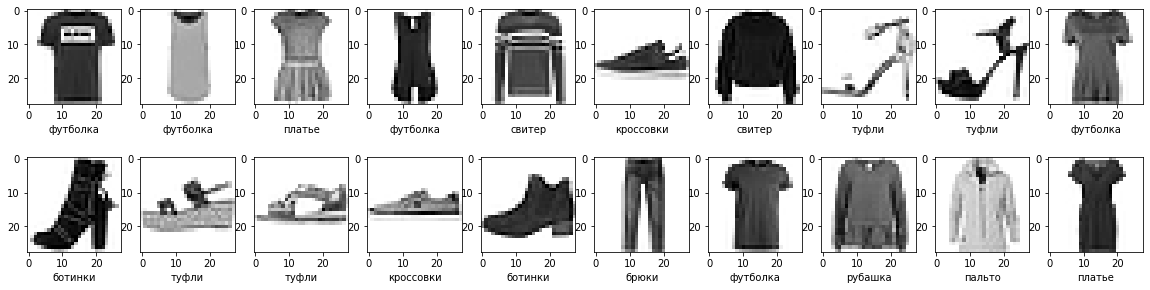

In [ ]:
plt.figure(figsize=(20,5))
for i in range(1,21):
    plt.subplot(2,10,i)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

## (2.2) Pre-processing

Преобразуем размерность

In [ ]:
X_train = X_train.reshape(60000, 784) # 60000 изображений по 784 пикселя в каждом
X_test = X_test.reshape(10000, 784)

### (2.2.2) Encoging

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

### (2.2.3) Normalization

In [ ]:
X_train = X_train / 255 
X_test = X_test / 255 

# (3) Model v.1

### Build

In [ ]:
model = Sequential()

model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


Входной слой: 800 нейронов * 724 входов + 800 весов = 628000 параметров

Выходной слой: 10 нейронов * 800 нейронов + 10 весов = 8010 параметров

### Train

In [ ]:
model.fit(X_train, y_train, batch_size=200, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
240/240 [==============================] - 5s 18ms/step - loss: 1.1907 - accuracy: 0.6504 - val_loss: 0.8387 - val_accuracy: 0.7401
Epoch 2/100
240/240 [==============================] - 4s 17ms/step - loss: 0.7655 - accuracy: 0.7602 - val_loss: 0.6985 - val_accuracy: 0.7743
Epoch 3/100
240/240 [==============================] - 4s 16ms/step - loss: 0.6674 - accuracy: 0.7897 - val_loss: 0.6343 - val_accuracy: 0.7997
Epoch 4/100
240/240 [==============================] - 4s 16ms/step - loss: 0.6140 - accuracy: 0.8058 - val_loss: 0.5949 - val_accuracy: 0.8092
Epoch 5/100
240/240 [==============================] - 4s 16ms/step - loss: 0.5785 - accuracy: 0.8152 - val_loss: 0.5652 - val_accuracy: 0.8143
Epoch 6/100
240/240 [==============================] - 4s 16ms/step - loss: 0.5534 - accuracy: 0.8208 - val_loss: 0.5436 - val_accuracy: 0.8213
Epoch 7/100
240/240 [==============================] - 4s 17ms/step - loss: 0.5336 - accuracy: 0.8260 - val_loss: 0.5287 - val_accuracy:

Сохраняем модель

In [ ]:
model.save('fashion_mnist_dense.h5')

Загрузка

In [ ]:
# from tensorflow.keras.models import load_model
# new_model = load_model('fashion_mnist_dense.h5')

# (4) Analysis/Evaluation

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3755 - accuracy: 0.8659


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.59



# (3) Model v.2

dense = 400, epochs = 30

In [ ]:
model2 = Sequential()

model2.add(Dense(400, input_dim=784, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


Вход: 400 * 784 + 400 = 314000

Выход: 10 * 400 (с первого слоя) + 10 весов = 4010

In [ ]:
model2.fit(X_train, y_train, batch_size=200, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
240/240 [==============================] - 3s 11ms/step - loss: 1.2149 - accuracy: 0.6465 - val_loss: 0.8638 - val_accuracy: 0.7322
Epoch 2/30
240/240 [==============================] - 2s 10ms/step - loss: 0.7851 - accuracy: 0.7525 - val_loss: 0.7150 - val_accuracy: 0.7718
Epoch 3/30
240/240 [==============================] - 2s 10ms/step - loss: 0.6839 - accuracy: 0.7828 - val_loss: 0.6487 - val_accuracy: 0.7910
Epoch 4/30
240/240 [==============================] - 2s 10ms/step - loss: 0.6297 - accuracy: 0.7993 - val_loss: 0.6062 - val_accuracy: 0.8022
Epoch 5/30
240/240 [==============================] - 2s 10ms/step - loss: 0.5936 - accuracy: 0.8092 - val_loss: 0.5766 - val_accuracy: 0.8112
Epoch 6/30
240/240 [==============================] - 2s 10ms/step - loss: 0.5677 - accuracy: 0.8155 - val_loss: 0.5586 - val_accuracy: 0.8136
Epoch 7/30
240/240 [==============================] - 2s 10ms/step - loss: 0.5468 - accuracy: 0.8205 - val_loss: 0.5391 - val_accuracy: 0.8190

In [ ]:
model.save('fashion_mnist_dense400.h5')

# (4) Analysis/Eva

In [ ]:
scores = model2.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.8418


# (3) Model v.3

(batch_size=300, layer2 = 600)

In [ ]:
model3 = Sequential()

model3.add(Dense(800, input_dim=784, activation="relu"))
model3.add(Dense(600, activation="relu"))
model3.add(Dense(10, activation="softmax"))

model3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_5 (Dense)              (None, 600)               480600    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                6010      
Total params: 1,114,610
Trainable params: 1,114,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit(X_train, y_train, batch_size=300, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
160/160 [==============================] - 7s 42ms/step - loss: 1.3825 - accuracy: 0.6225 - val_loss: 0.9443 - val_accuracy: 0.7199
Epoch 2/30
160/160 [==============================] - 7s 42ms/step - loss: 0.8311 - accuracy: 0.7437 - val_loss: 0.7396 - val_accuracy: 0.7618
Epoch 3/30
160/160 [==============================] - 7s 41ms/step - loss: 0.6995 - accuracy: 0.7778 - val_loss: 0.6545 - val_accuracy: 0.7927
Epoch 4/30
160/160 [==============================] - 7s 42ms/step - loss: 0.6311 - accuracy: 0.7981 - val_loss: 0.6037 - val_accuracy: 0.8067
Epoch 5/30
160/160 [==============================] - 7s 41ms/step - loss: 0.5869 - accuracy: 0.8104 - val_loss: 0.5699 - val_accuracy: 0.8128
Epoch 6/30
160/160 [==============================] - 7s 41ms/step - loss: 0.5571 - accuracy: 0.8186 - val_loss: 0.5444 - val_accuracy: 0.8194
Epoch 7/30
160/160 [==============================] - 7s 42ms/step - loss: 0.5336 - accuracy: 0.8247 - val_loss: 0.5325 - val_accuracy: 0.8214

In [ ]:
scores = model3.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.4317 - accuracy: 0.8495


In [ ]:
model3.save('fashion_mnist_dense_layer2.h5')

# Вывод

1. loss: 0.3755 - accuracy: 0.8659
2. loss: 0.4524 - accuracy: 0.8418
3. loss: 0.4317 - accuracy: 0.8495


---

